In [13]:
%matplotlib widget
from IPython.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
from random import uniform, seed
from tabulate import tabulate
from numpy import argmax
import numpy as np
from dadk.QUBOSolverCPU import *
import matplotlib.pyplot as plt
import networkx as nx
from random import random
from busLinesQUBOMethods import *

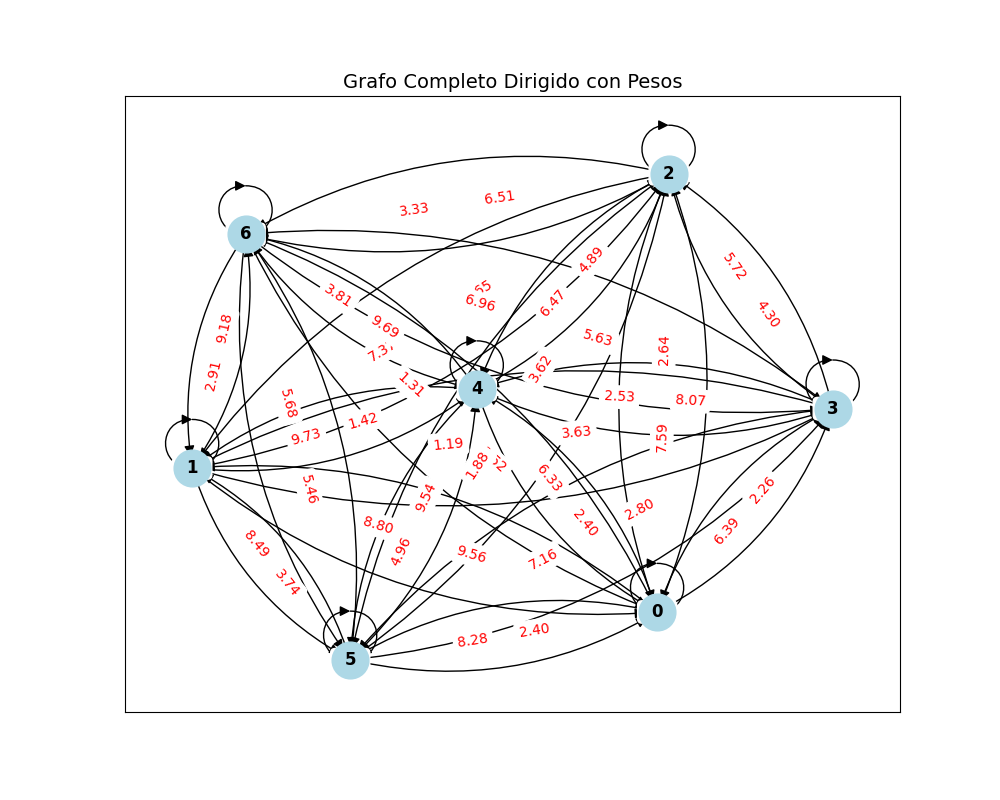

In [19]:
N, L, seed = 7, 2, 42
A, B = 1, 50

# Crear grafo y matriz de distancias
graph, distances = create_complete_graph(N, seed, zeroSelfDistance=False)
draw_graph(graph)

In [20]:
# Crear QUBO
H_distances, H_constraints, HQ = build_qubo(graph, distances, N, L, A, B)
print("H_distances = ", H_distances, "\nH_constraints = ", H_constraints, "\nHQ = ", HQ)

H_distances =  9.72918866945795 x_0 + 9.72918866945795 x_1 + 9.556428757689245 x_2 + 9.556428757689245 x_3 + 7.587945476302646 x_4 + 7.587945476302646 x_5 + 6.387926357773329 x_6 + 6.387926357773329 x_7 + 2.4041677639819286 x_8 + 2.4041677639819286 x_9 + 2.403950683025824 x_10 + 2.403950683025824 x_11 + 1.5227525095137953 x_12 + 1.5227525095137953 x_13 + 8.795585311974417 x_14 + 8.795585311974417 x_15 + 9.72918866945795 x_16 + 9.72918866945795 x_17 + 7.372653200164409 x_18 + 7.372653200164409 x_19 + 1.185260448662222 x_20 + 1.185260448662222 x_21 + 9.72918866945795 x_22 + 9.72918866945795 x_23 + 8.491983767203795 x_24 + 8.491983767203795 x_25 + 2.9110519961044856 x_26 + 2.9110519961044856 x_27 + 2.636424704863906 x_28 + 2.636424704863906 x_29 + 2.650640588680904 x_30 + 2.650640588680904 x_31 + 9.72918866945795 x_32 + 9.72918866945795 x_33 + 5.72280788469014 x_34 + 5.72280788469014 x_35 + 4.887505167779041 x_36 + 4.887505167779041 x_37 + 3.6210622617823773 x_38 + 3.6210622617823773 x_39

In [21]:
solver = QUBOSolverCPU(
    number_iterations=500000,  # Aumentar iteraciones
    number_runs=20,  # Aumentar el número de corridas
    scaling_bit_precision=32,
    auto_tuning=AutoTuning.AUTO_SCALING_AND_SAMPLING
)
solution_list = solver.minimize(HQ)

print(solution_list.solver_times)


********************************************************************************
Scaling qubo, temperature_start, temperature_end and offset_increase_rate
  factor:                      1952062.00000
********************************************************************************


********************************************************************************
Effective values (including scaling factor)
  temperature_start:           433300000.000
  temperature_end:              48760000.000
  offset_increase_rate:        133500000.000
  duration:                            0.003 sec
********************************************************************************

+--------------+----------------------------+----------------------------+----------------+
| time         | from                       | to                         | duration       |
|--------------+----------------------------+----------------------------+----------------|
| anneal       | 2025-01-22 11:42:09.048791 | 202

In [22]:
# Procesar solución
active_edges, colors = prep_bus_solution(HQ, H_distances, H_constraints, solution_list, N, L)

HQ  = 3367.849948
H_distances =  17.849948
H_constraints =  67.000000


Number of nodes:           7
Number of lines:           2
Number of edges:          49
Active edges:              7
Active edges details:  [(0, 6, 0), (1, 3, 1), (2, 0, 0), (3, 5, 1), (4, 1, 1), (5, 4, 1), (6, 2, 0)]



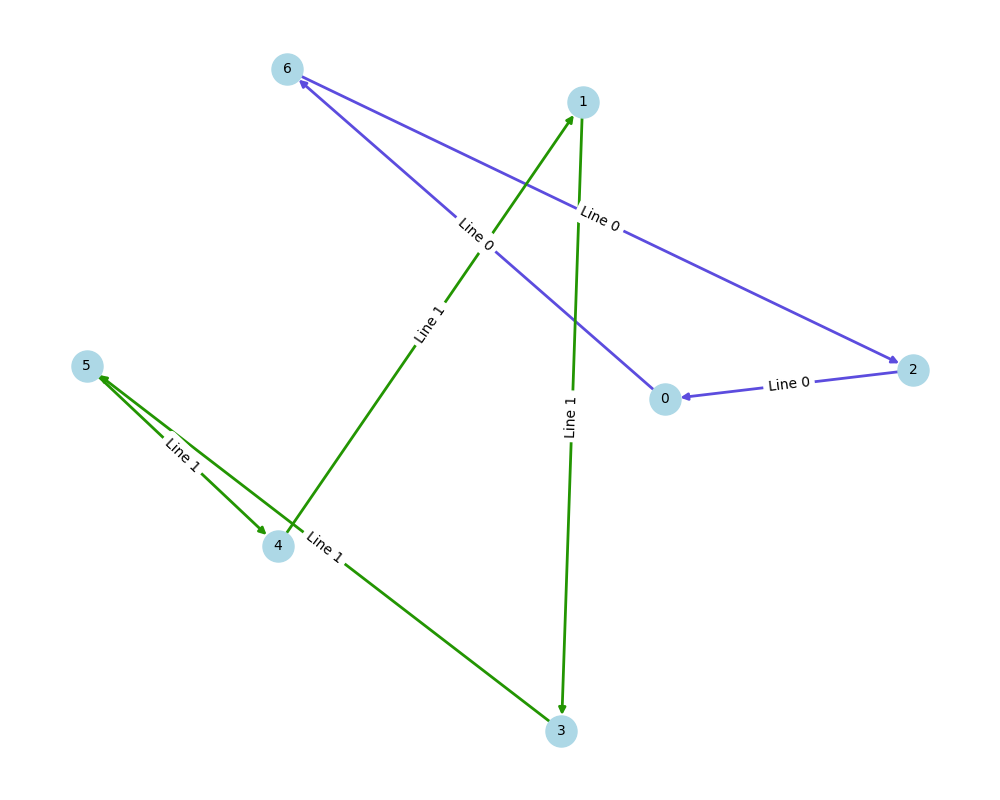

In [23]:
# Reporte y visualización
report_bus_solution(N, L, graph, active_edges)
draw_bus_graph(graph, active_edges, colors)

In [7]:
def adjacency_matrix_for_line(N, active_edges, line):
    # Crear una matriz de adyacencia vacía
    adjacency_matrix = np.zeros((N, N), dtype=int)
    
    # Rellenar la matriz de adyacencia para la línea especificada
    for i, j, l in active_edges:
        if l == line:
            adjacency_matrix[i, j] = 1
    
    return adjacency_matrix

adj_matrix = adjacency_matrix_for_line(N, active_edges, 1)
print(tabulate(adj_matrix, tablefmt="fancy_grid"))

╒═══╤═══╤═══╤═══╤═══╕
│ 0 │ 0 │ 0 │ 0 │ 1 │
├───┼───┼───┼───┼───┤
│ 1 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┤
│ 0 │ 1 │ 0 │ 0 │ 0 │
╘═══╧═══╧═══╧═══╧═══╛
